<a href="https://colab.research.google.com/github/CS23M005/DL_A1/blob/main/FFNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import fashion_mnist
from keras.datasets import mnist

In [ ]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
samples_for_print = [];
unique_labels = np.unique(y_train)
u_l = np.copy(unique_labels)

while(len(unique_labels)>0):
  for i in range (0, len(y_train)):
    if(y_train[i] == unique_labels[0]):
      samples_for_print.append(X_train[i])
      unique_labels = np.setdiff1d(unique_labels,unique_labels[0])
      break


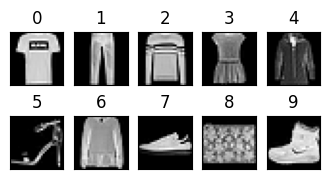

In [ ]:
i = 1
rows = 2
cols = int(len(samples_for_print)/rows)
plt.figure(figsize = (4,2))
for img in samples_for_print:
    plt.subplot(rows, cols, i)
    plt.imshow(img, cmap='gray')
    plt.title(u_l[i-1])
    plt.tick_params(left = False, right = False , labelleft = False ,
                labelbottom = False, bottom = False)
    i = i+1
plt.show()

In [91]:
from random import seed
from random import random

def init_random(n1, n2):
  return [[random() for i in range(n1)] for j in range(n2)]

def init_nn(n_inputs, n_layers, n_neurons, n_outputs):
  network = []
  input_layer = init_random(n_inputs, n_neurons)
  network.append(input_layer)
  for i in range(0,n_layers-1):
    hidden_layer = init_random(n_neurons, n_neurons)
    network.append(hidden_layer)
  output_layer = init_random(n_neurons, n_outputs)
  network.append(output_layer)
  biases = [random() for i in range(n_layers+1)]
  return network, biases

seed(1)
n_inputs = 784
n_layers = 2
n_neurons = 784
n_outputs = 2
w,b = init_nn(n_inputs, n_layers, n_neurons, n_outputs)

In [120]:
def ud_sigmoid(a):
  return 1/(1 + np.exp(-1*np.array(a)))

def ud_softmax(a):
  e = np.exp(a)
  return e / e.sum()

def forward_prop(w, b, sample, n_layers):
  a = []
  h = []
  h.append(sample)
  for i in range(1, n_layers+1):
    a.append(np.matmul(w[i-1],h[i-1])+b[i-1])
    h.append(ud_sigmoid(a[i-1]))
  a.append(np.matmul(w[n_layers],h[n_layers])+b[n_layers])
  y = ud_softmax(a[n_layers])
  return y

sample = X_train[12000].flatten()
sample.shape

y = forward_prop(w, b, sample, n_layers)
print(y)




[0.99118106 0.00881894]


In [99]:
len(w[2][1])

784